## About

Working with energy efficiency dataset related to residential buildings. Based on publication ['Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools'](https://scholar.google.com/scholar?hl=en&q=A.+Tsanas%2C+A.+Xifara%3A+%27Accurate+quantitative+estimation+of+energy+performance+of+residential+buildings+using+statistical+machine+learning+tools%27%2C+Energy+and+Buildings%2C+Vol.+49%2C+pp.+560-567%2C+2012&btnG=&as_sdt=1%2C5&as_sdtp=) by A. Tsanas and A. Xifara published in Energy and Buildings, Vol. 49, pp. 560-567, 2012.

### Links

* [Energy efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

### Git Repository

* [energy-residential-buildings](https://github.com/vdmitriyev/data-analysis-notebooks/tree/master/energy-residential-buildings)


### Description of Dataset

#### Data Set Information

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

#### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. 

Specifically: 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
* X4	Roof Area 
* X5	Overall Height 
* X6	Orientation 
* X7	Glazing Area 
* X8	Glazing Area Distribution 
* y1	Heating Load 
* y2	Cooling Load



### Overall Data Analysis Approach

* A. Prelimenary Statistical Analysis
	1. Make charts with probability density estimate in order to see that data are not distributed normally (non-Gaussian).
	2. Make scatter plots with correlations in order to show visually that it's hardly traceable.
	3. Report with tables filled with values that mutual information and correlations coefficients are properly holding.
	4. Create table with matrix showing correlations between input variables (covariance matrix).
* B. Machine Learning
	5. Obtain coefficients for final model within the 100 random tries (via cross-validation's K-fold) to see that they are stable.
	6. For each machine learning method (IRLS, Random Forest) and each measuring method (MAE, MSE, MRE) calculate mean and standard deviation, which then should be averaged over all attempts made (x100).

### Loading Data

The first step is always a data loading. Before loading data was converted from original Excel file into CSV.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

dataset = pd.read_csv('data/ENB2012-data-uci.csv', sep=';')
columns = ['X1 Relative Compactness',
           'X2 Surface Area',
           'X3 Wall Area',
           'X4 Roof Area',
           'X5 Overall Height',
           'X6 Orientation',
           'X7 Glazing Area',
           'X8 Glazing Area Distribution',
           'y1 Heating Load',
           'y2 Cooling Load']

mapping = {'X1' : columns[0], 
           'X2' : columns[1],
           'X3' : columns[2],
           'X4' : columns[3],
           'X5' : columns[4],
           'X6' : columns[5],
           'X7' : columns[6],
           'X8' : columns[7],
           'Y1' : columns[8],
           'Y2' : columns[9]}

mapping = collections.OrderedDict(sorted(mapping.items()))
target_cols_X = [mapping[x] for x in mapping if x[0] != 'Y']
#print (target_cols_X)

target_cols_Y = [mapping[x] for x in mapping if x[0] == 'Y']
#print (target_cols_Y)

dataset.columns = columns
dataset.head(5)

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution,y1 Heating Load,y2 Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Data Description

In [2]:
dataset.describe()

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution,y1 Heating Load,y2 Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A067518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009FD7B38>]], dtype=object)

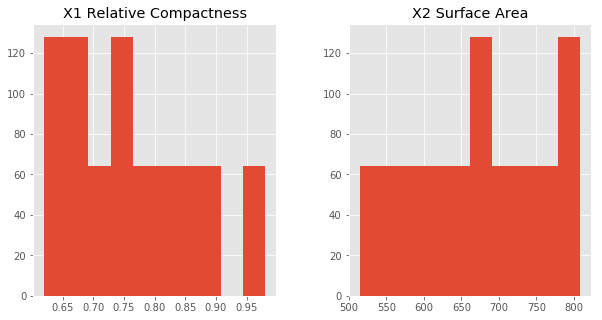

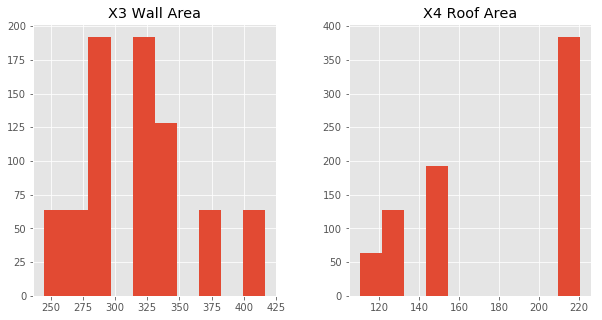

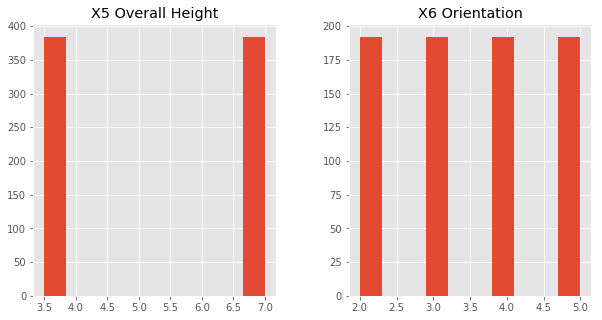

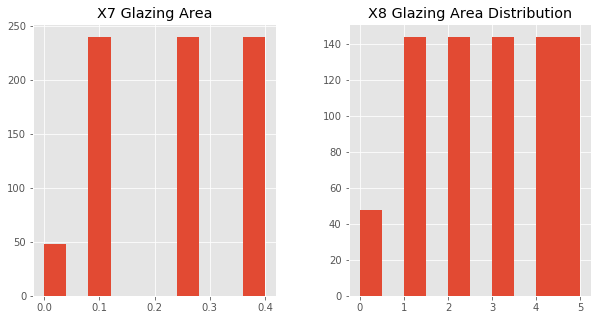

In [3]:
dataset[[mapping["X1"], mapping["X2"]]].hist(bins=10, figsize = (10,5))
dataset[[mapping["X3"], mapping["X4"]]].hist(bins=10, figsize = (10,5))
dataset[[mapping["X5"], mapping["X6"]]].hist(bins=10, figsize = (10,5))
dataset[[mapping["X7"], mapping["X8"]]].hist(bins=10, figsize = (10,5))

In [4]:
# try all styles
# for style in plt.style.available:
#     plt.style.use(style)
#     print (style)
#     dataset[[mapping["X1"], mapping["X2"]]].hist(bins=10, figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000096C4F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A7B1BE0>]], dtype=object)

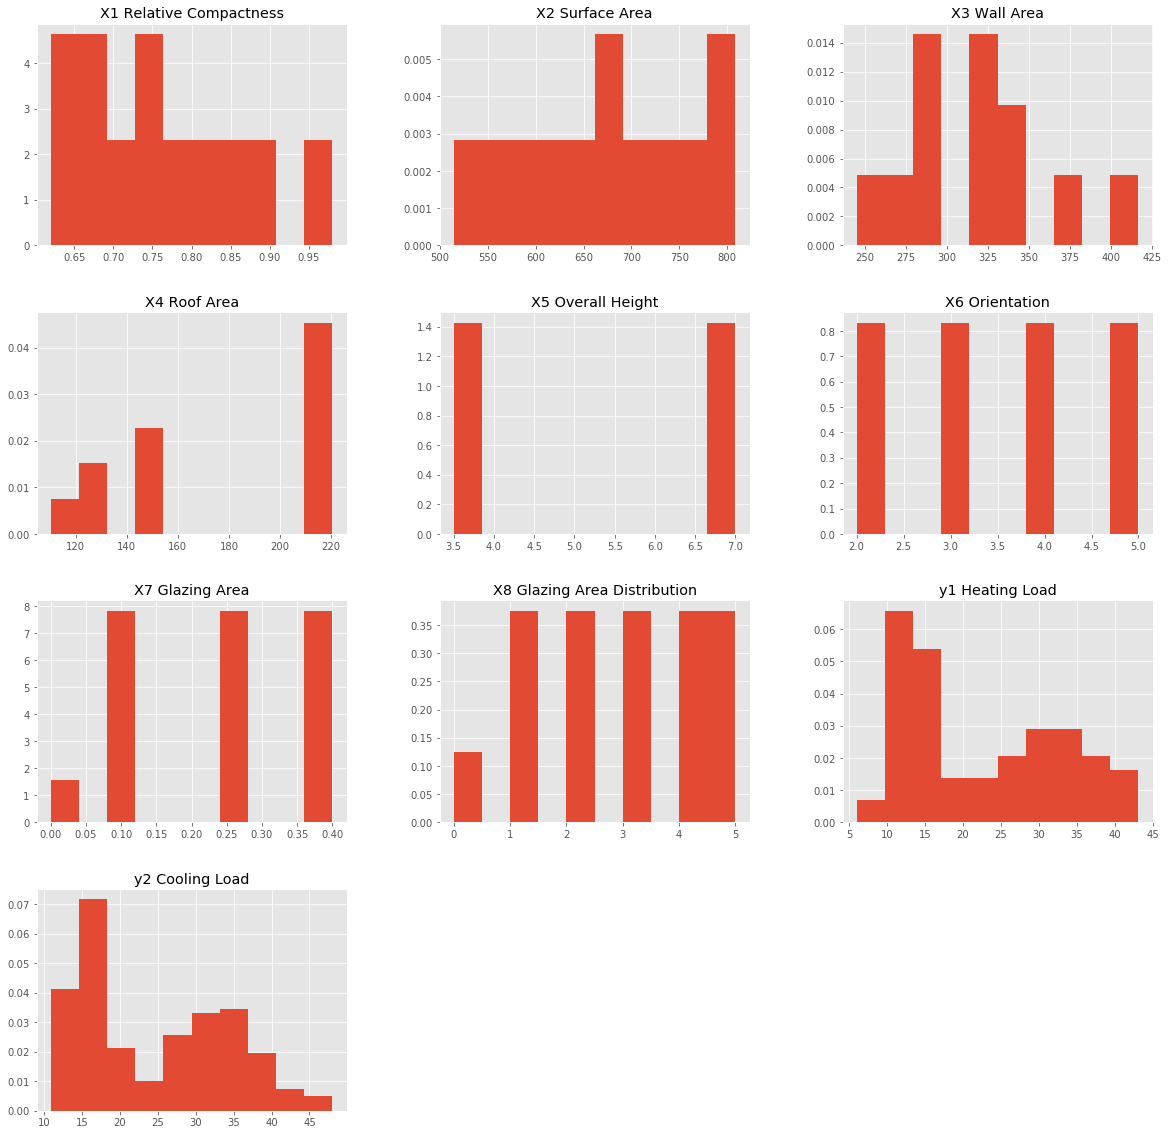

In [5]:
# different view of histograms
#dataset[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]].hist(bins=10, figsize = (10,10) , normed=1)
dataset.hist(bins=10, figsize = (20,20), normed=1)

Plotting target/output variables in form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A8BC2B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A246978>]], dtype=object)

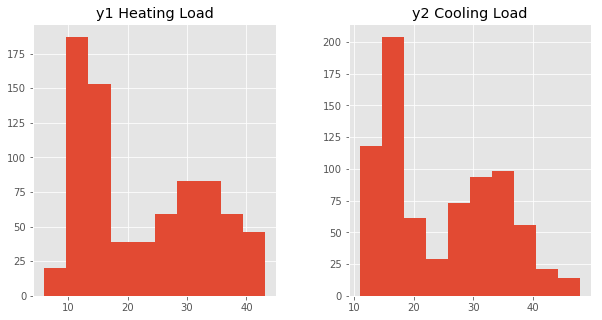

In [6]:
dataset[[mapping["Y1"], mapping["Y2"]]].hist(bins=10, figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009E13208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009D33F60>]], dtype=object)

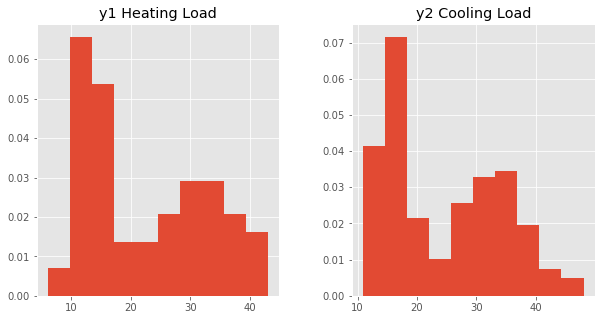

In [7]:
# normalized
dataset[[mapping["Y1"], mapping["Y2"]]].hist(bins=10, figsize = (10,5), normed=1)

### Data Preprocessing

#### Normalizing Data in Dataset - Multiple Approaches

In [31]:
def normalize_sklearn(dataset):
    """normalization of an input dataset"""
    from sklearn import preprocessing
    x = dataset.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame(x_scaled)
    return df_norm

def normalize_manually(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        print ('min_value: {0}, max_value: {1}'.format(min_value, max_value))
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df_norm_v1 = normalize_sklearn(dataset)
df_norm_v2 = normalize_manually(dataset)
df_norm = df_norm_v2

min_value: 0.62, max_value: 0.98
min_value: 514.5, max_value: 808.5
min_value: 245.0, max_value: 416.5
min_value: 110.25, max_value: 220.5
min_value: 3.5, max_value: 7.0
min_value: 2, max_value: 5
min_value: 0.0, max_value: 0.4
min_value: 0, max_value: 5
min_value: 6.01, max_value: 43.1
min_value: 10.9, max_value: 48.03


In [32]:
df_norm_v1.head(5)
#df_norm_v1.tail(15)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [33]:
df_norm_v1.describe()

,0,1,2,3,4,5,6,7,8,9
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,0.439396,0.368644
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,0.272046,0.256216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,0.188258,0.127121
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,0.348881,0.301104
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,0.691763,0.598775
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df_norm_v2.head(5)
#df_norm_v2.tail(15)

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution,y1 Heating Load,y2 Cooling Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [35]:
df_norm_v2.describe()

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution,y1 Heating Load,y2 Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,0.439396,0.368644
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,0.272046,0.256216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,0.188258,0.127121
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,0.348881,0.301104
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,0.691763,0.598775
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Comparing Normalization Approaches

Replacing all values that are smaller then particular epsilon (my own choice) with zeros and counting total amount of zeros in each collumn.

In [11]:
#from pandas.util.testing import assert_frame_equal
#assert_frame_equal(df_norm, df_norm_v2)

def compare_normalization_approaches(df_norm_v1, df_norm_v2):
    """Replacing all values that are smaller then particular epsilon (my own choice) 
       with zeros and counting total amount of zeros in each collumn.
    """
    EPSILON = 0.000000000000001
    comparison_array = df_norm_v1.values - df_norm_v2.values
    comparison_array[comparison_array < EPSILON] = 0
    print ('Total number of zeros in earch row (in each should be 768)')
    print ((comparison_array == 0).astype(int).sum(axis=0))
    
compare_normalization_approaches(df_norm_v1, df_norm_v2)

Total number of zeros in earch row (in each should be 768)
[768 768 768 768 768 768 768 768 768 768]


In [12]:
# df_norm_v1.hist(bins=10, figsize = (15,15))

### Boxplot

Making plots with boxplot.

In [13]:
def plot_multiple_boxplots():
    
    for key in mapping:
        if key[0] != 'Y':
            dataset[[mapping[key]]].plot.box(figsize = (5,5))
            
# plot_multiple_boxplots()

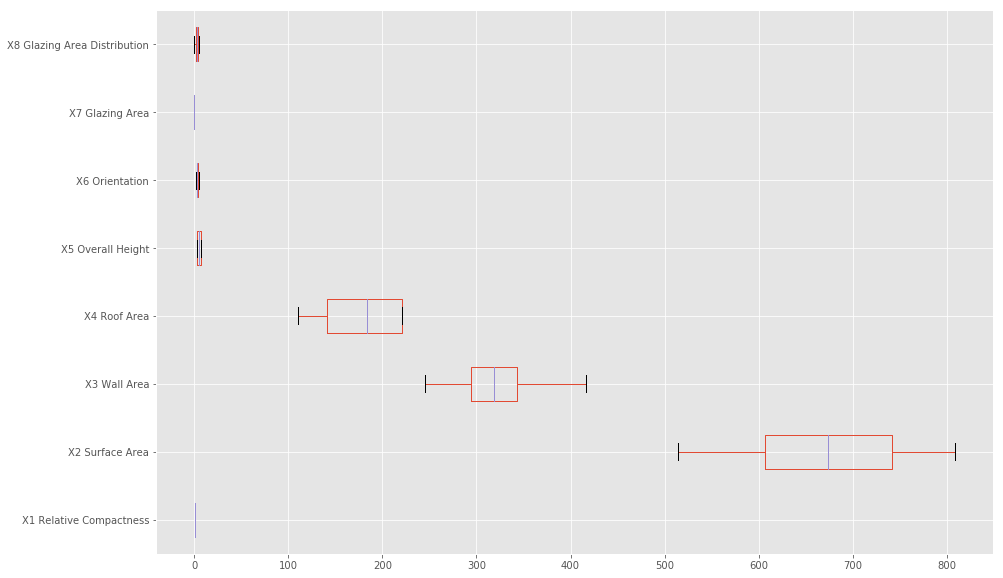

In [14]:
dataset[target_cols_X].plot.box(figsize = (15,10), vert=False)

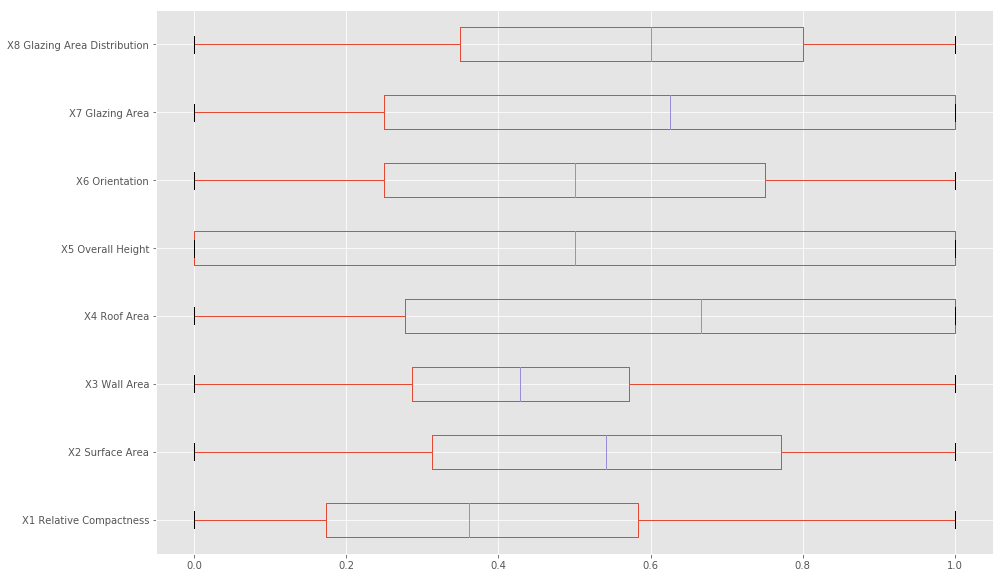

In [15]:
df_norm[target_cols_X].plot.box(figsize = (15,10), vert=False)

#### Scatter Plot

Making scatter plot that compares normalized values of input with normalized values of output.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D29B400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF716D8>]], dtype=object)

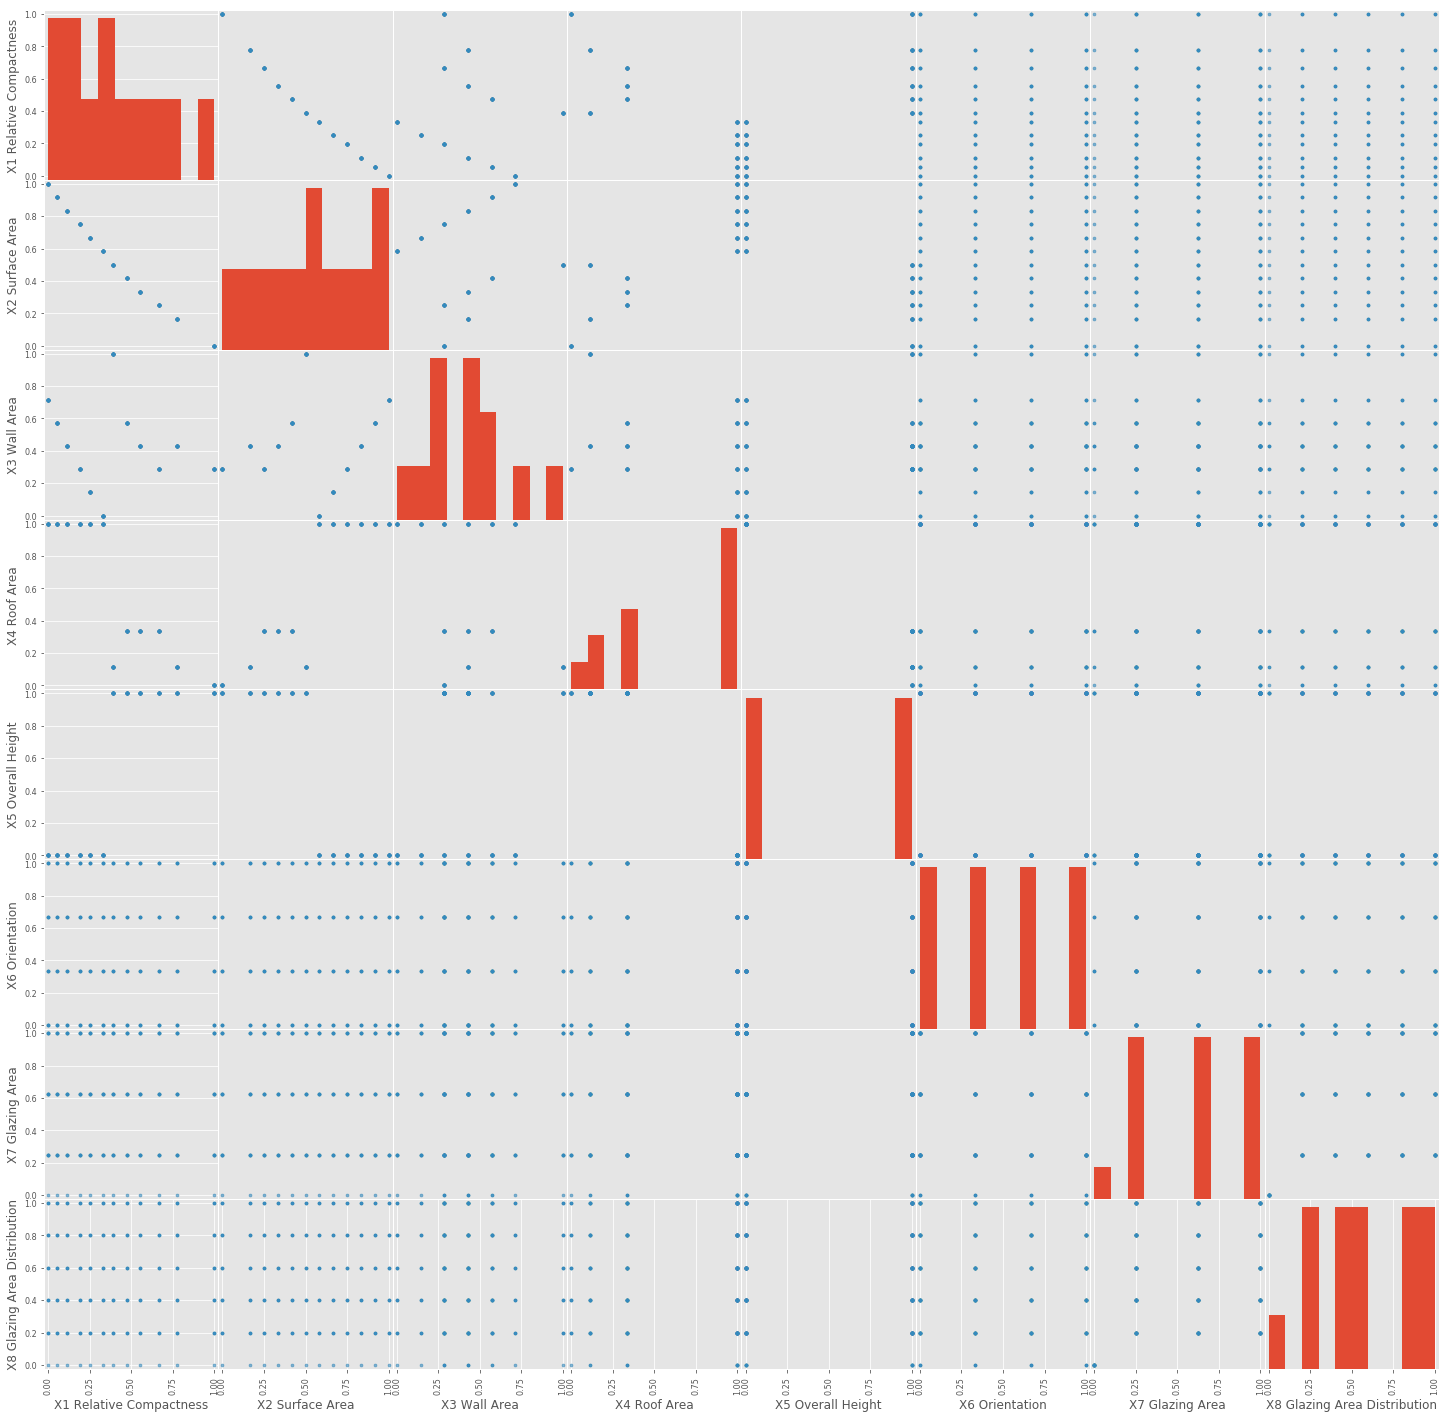

In [16]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_norm[target_cols_X], alpha=0.2, figsize=(25, 25))

In [17]:
def plot_scatter(df, target_output):
    """ Making scatter plot for input/output comparison """
    
    if target_output not in ('Y1', 'Y2'):
        print ('Wrong target output variable for plotting')
        return None
    
    for key in mapping:
        if key[0] != 'Y':
            df.plot.scatter(x=mapping[key], y=mapping[target_output], figsize = (3,3))

#plot_scatter(df_norm, 'Y1') 
#plot_scatter(df_norm, 'Y2')

Comparing all input values with output **'y1 Heating Load'** and **'y2 Cooling Load'**

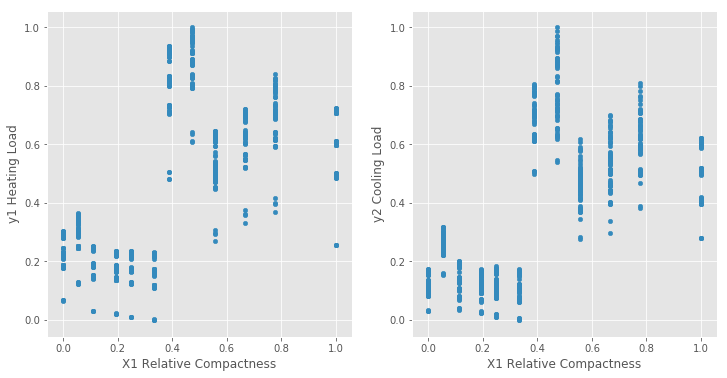

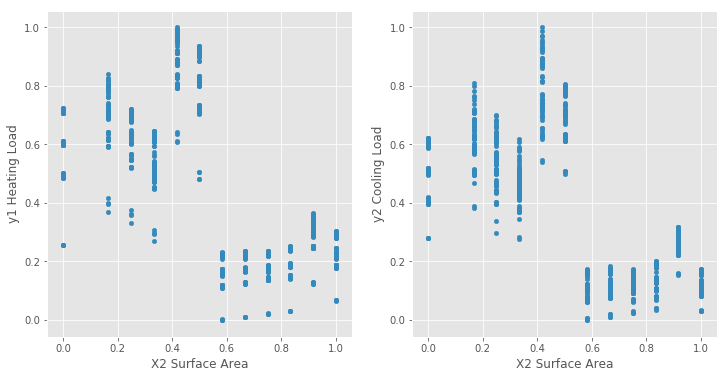

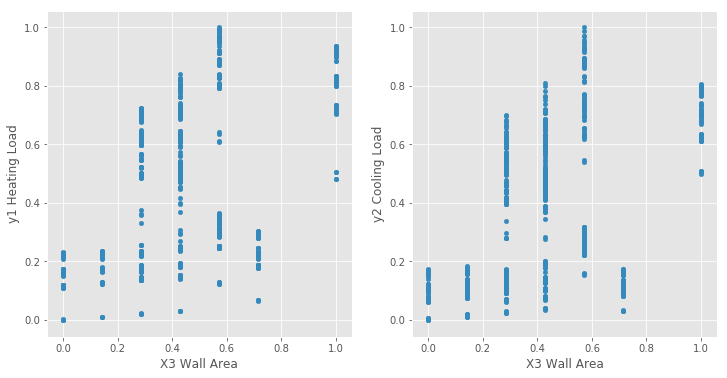

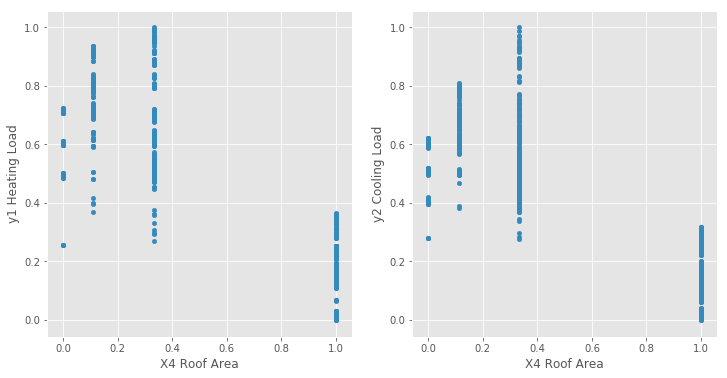

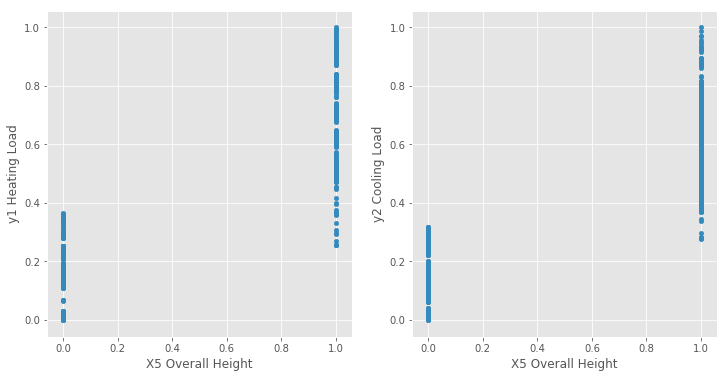

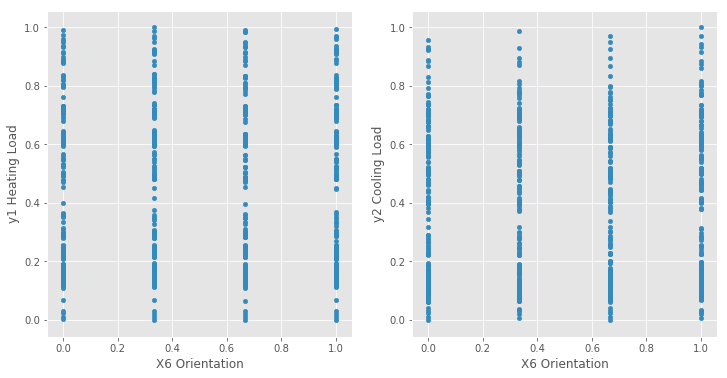

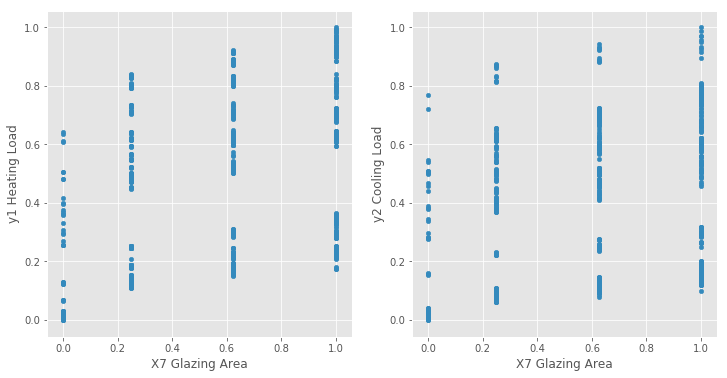

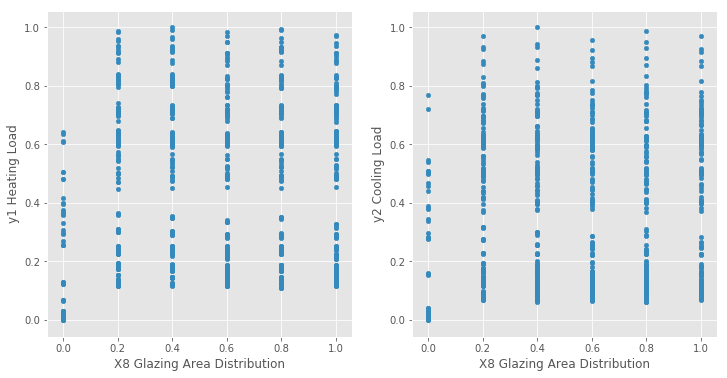

In [18]:
for key in mapping:
    
    if key[0] != 'Y':
        fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize = (12,6))
        df_norm.plot.scatter(x=mapping[key], y=mapping["Y1"], ax=ax1, grid=True)
        df_norm.plot.scatter(x=mapping[key], y=mapping["Y2"], ax=ax2, grid=True)

### Correlations

After plotting data in form of scatter and histogram, it's make sense to prove correlation between input variables and output onces.

In [19]:
print ('{feature}\t\t\t\t{correlation_with_Y1}\t{correlation_with_Y2}'.format(feature='Key', 
                                                                       correlation_with_Y1='correlation_with_Y1', 
                                                                       correlation_with_Y2='cor_spearman_y2'))
for key in mapping:
    if key[0] != 'Y':
        cor_spearman_y1 = df_norm[mapping[key]].corr(df_norm[mapping["Y1"]], method='spearman')
        cor_spearman_y2 = df_norm[mapping[key]].corr(df_norm[mapping["Y2"]], method='spearman')
        print ('{feature}\t\t\t{correlation_with_Y1}\t\t{correlation_with_Y2}'.format(feature=mapping[key], 
                                                                               correlation_with_Y1=cor_spearman_y1, 
                                                                               correlation_with_Y2=cor_spearman_y2))

Key				correlation_with_Y1	cor_spearman_y2
X1 Relative Compactness			0.6221346966316251		0.6510194890890085
X2 Surface Area			-0.6221346966316251		-0.6510194890890085
X3 Wall Area			0.47145765013625385		0.41599078037979476
X4 Roof Area			-0.8040270001230636		-0.8031745820750258
X5 Overall Height			0.8612825770633121		0.8648761012828038
X6 Orientation			-0.004163070656793656		0.01760570082978697
X7 Glazing Area			0.32286032044187585		0.28890448663193935
X8 Glazing Area Distribution			0.06834346384827288		0.046477002479860696


Looking at the correlation between input variables.

In [20]:
df_norm[target_cols_X].corr(method='spearman')

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution
X1 Relative Compactness,1.000000,-1.000000,-0.255805,-0.870886,0.869048,0.0,0.000000,0.000000
X2 Surface Area,-1.000000,1.000000,0.255805,0.870886,-0.869048,0.0,0.000000,0.000000
X3 Wall Area,-0.255805,0.255805,1.000000,-0.193457,0.220763,0.0,0.000000,0.000000
X4 Roof Area,-0.870886,0.870886,-0.193457,1.000000,-0.937043,0.0,0.000000,0.000000
X5 Overall Height,0.869048,-0.869048,0.220763,-0.937043,1.000000,0.0,0.000000,0.000000
X6 Orientation,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
X7 Glazing Area,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.187592
X8 Glazing Area Distribution,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.187592,1.000000


## Training Machine Learning Models

#### Random Forest Classification

In [21]:
def random_forest_dataset_pima_diabetes():
    """ Sample usage of Random Forest taken from following URL:
        - http://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
        
        Dataset:
            Number of Instances: 768

            For Each Attribute: (all numeric-valued)
               1. Number of times pregnant
               2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
               3. Diastolic blood pressure (mm Hg)
               4. Triceps skin fold thickness (mm)
               5. 2-Hour serum insulin (mu U/ml)
               6. Body mass index (weight in kg/(height in m)^2)
               7. Diabetes pedigree function
               8. Age (years)
   
    """
    
    import sklearn
    import pandas as pd
    from sklearn import model_selection
    from sklearn.ensemble import RandomForestClassifier

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
    names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
    dataframe = pd.read_csv(url, names=names)
    print(dataframe.describe())
    
#     # visualization
#     import matplotlib.pyplot as plt
#     plt.style.use('default')
#     dataframe.hist(figsize = (15,10))
    
    array = dataframe.values
    X = array[:, 0:8]
    Y = array[:, 8]
    print (X)
    print (Y)
    
    # params
    seed         = 7
    num_trees    = 100
    max_features = 8
    
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
    results = model_selection.cross_val_score(model, X, Y, cv=kfold)
    print('\nRF results: {0}'.format(results.mean()))

# for value in range(10):
#     random_forest_dataset_pima_diabetes()

#random_forest_dataset_pima_diabetes()

In [22]:
def rf_regressor(target_output="Y1"):
    """ Using Random Forest with Regressors.  
    
        Detailed information here - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
    """
    
    if target_output not in ("Y1", "Y2"):
        print ('No such output variable column existing.')
        return None
    else:
        print ('\n"{0}" - TARGET OUTPUT VARIABLE'.format(target_output))
        print ('MSE - Mean Squared  Error')
        print ('MAE - Mean Absolute Error')
        print ('MRE - Mean Relative Error')
        
    import sklearn
    import pandas as pd
    from sklearn import model_selection
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    # data
    X =  dataset[target_cols_X].values
    Y =  dataset[mapping[target_output]].values

    # splitting in train and test 
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state = 1)
    
    # params
    seed         = 7
    max_features = 8
    num_trees    = 100
    num_splits   = 10
    #num_splits   = 100
    
    rf = RandomForestRegressor(n_estimators=num_trees, 
                               max_features=max_features, 
                               verbose=0#,
                                #oob_score=True
                                )
    
    rf_model = rf.fit(X_train, Y_train)
    
    print ('MSE (unseen): {0}'.format(mean_squared_error(rf_model.predict(X_test), Y_test)))
    print ('MAE (unseen): {0}'.format(mean_absolute_error(rf_model.predict(X_test), Y_test)))
    
    coef_part = (100 * (1/Y_test.size))
    sum_part = sum((abs(rf_model.predict(X_test) - Y_test)) / Y_test)
    print ('MRE (unseen): {0}'.format(coef_part * sum_part))
    
    
#     kfold = model_selection.KFold(n_splits=num_splits, random_state=seed)
#     results = model_selection.cross_val_score(model, X, Y, cv=kfold)
    results = model_selection.cross_val_score(rf, X, Y, cv=num_splits)
    
    print (results)
    print('\nRF Mean Results: {0}\n\n'.format(results.mean()))   
    print('Accuracy: %0.2f (+/- %0.2f)' % (results.mean(), results.std() * 2))
    
    #model.fit(X, Y)
    #print (model.decision_path(X))
    #print (rf.get_params())

rf_regressor(target_output="Y1")
# rf_regressor(target_output="Y1")
# rf_regressor(target_output="Y2")


"Y1" - TARGET OUTPUT VARIABLE
MSE - Mean Squared  Error
MAE - Mean Absolute Error
MRE - Mean Relative Error
MSE (unseen): 0.26286232921875163
MAE (unseen): 0.36959322916666704
MRE (unseen): 1.550573096727992
[ 0.720  0.999  0.996  0.996  0.997  0.997  0.998  0.997  0.995  0.996]

RF Mean Results: 0.9690937584564796


Accuracy: 0.97 (+/- 0.17)


#### Testing Decistion Tree Regressor - 01

In [23]:
import math
from sklearn import tree

# data
X =  dataset[target_cols_X].values
Y =  dataset[mapping["Y1"]].values

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, Y)
mse  = 0.0
Y =  dataset[mapping["Y2"]].values

for index, row in enumerate(X):
    #print (row)
    delta = Y[index] - clf.predict([row])[0]
    mse = mse + math.fabs(delta) * math.fabs(delta)
#     if math.fabs(delta) > 0.01:
#         print ('original: {0}; estimated: {1}; delta: {2}'.format(Y[index], clf.predict([row])[0], delta))
    
print ('MSE: {0}'.format( mse / len(Y)))

MSE: 10.161391276041668


#### Testing Decistion Tree Regressor - 02

In [24]:
from sklearn import model_selection
#from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# data
X =  dataset[target_cols_X].values
Y =  dataset[mapping["Y1"]].values

# params
seed         = 7
max_features = 8
num_trees    = 100

kfold = model_selection.KFold(n_splits=10, random_state=seed)
regressor = DecisionTreeRegressor(random_state=0)
results = model_selection.cross_val_score(regressor, X, Y, cv=kfold)

print('\nResults: {0}'.format(results.mean()))    


Results: 0.9687168924085643


### Linear Regression 

In [25]:
def print_info_size(X_train, X_test):
    
    #print (dir(X_train))
    total = X_train.size + X_test.size
    print ('X_total: {0},\t{1}%'.format(total, 100))
    print ('X_train: {0},\t{1}%'.format(X_train.size, float(X_train.size/total)*100))
    print ('X_test : {0},\t{1}%'.format(X_test.size, float(X_test.size/total)*100))
    
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

#from sklearn.model_selection import cross_val_predict
#from sklearn.model_selection import cross_val_score

# data
X =  dataset[target_cols_X].values
Y =  dataset[mapping["Y1"]].values

# splitting in train and test 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state = 0)

print_info_size(X_train, X_test)

# cv
#skf = model_selection.StratifiedKFold()

lr = linear_model.LinearRegression(normalize=True)
lr_model = lr.fit(X_train, Y_train)

print ('Intercept: {0:.2f}'.format(lr_model.intercept_)) 
print ('Coefs: {0}'.format(lr_model.coef_))
print ('Test score: {0}'.format(lr_model.score(X_test, Y_test)))
print ('MSE: {0}'.format(100 * mean_squared_error(lr_model.predict(X_test), Y_test)))

lr_model2 = model_selection.cross_val_score(lr, X_test, Y_test, cv=10, verbose = 1)
print ('\nMODEL2:\n {0} | {1}'.format(lr_model2.mean(), lr_model2))

paper_coeff_y1 = np.array([-4.75, -0.03, +0.07, 0, -3.44, -0.01, +18.13, +0.09])
paper_Y_test = [] 
for index, row in enumerate(X_test):
    paper_Y = sum(row * paper_coeff_y1)
    print (paper_coeff_y1)
    print (row)
    paper_Y_test.append(paper_Y)
    print ('{0}\t{1}\t{2}'.format(paper_Y, Y_test[index], abs(paper_Y - Y_test[index]))) 

#paper_Y_test = normalize_manually(pd.DataFrame(paper_Y_test))

#     print ( - )
print ('MSE with paper: {0}'.format(mean_squared_error(paper_Y_test, Y_test)))

X_total: 6144,	100%
X_train: 4608,	75.0%
X_test : 1536,	25.0%
Intercept: 71.07
Coefs: [-55.192  346193658640.228 -346193658640.244 -692387317280.613  4.028
 -0.068  19.470  0.168]
Test score: 0.9114887412857418
MSE: 956.0380324227708

MODEL2:
 0.9063653479258693 | [ 0.867  0.948  0.856  0.896  0.877  0.892  0.960  0.912  0.932  0.923]
[-4.750 -0.030  0.070  0.000 -3.440 -0.010  18.130  0.090]
[ 0.660  759.500  318.500  220.500  3.500  3.000  0.400  3.000]
-8.172999999999998	15.18	23.352999999999998
[-4.750 -0.030  0.070  0.000 -3.440 -0.010  18.130  0.090]
[ 0.740  686.000  245.000  220.500  3.500  4.000  0.100  2.000]
-17.031999999999996	10.32	27.351999999999997
[-4.750 -0.030  0.070  0.000 -3.440 -0.010  18.130  0.090]
[ 0.790  637.000  343.000  147.000  7.000  3.000  0.100  2.000]
-20.9695	37.26	58.2295
[-4.750 -0.030  0.070  0.000 -3.440 -0.010  18.130  0.090]
[ 0.820  612.500  318.500  147.000  7.000  4.000  0.000  0.000]
-24.094999999999995	16.95	41.044999999999995
[-4.750 -0.030

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


-13.507499999999997	36.95	50.457499999999996
[-4.750 -0.030  0.070  0.000 -3.440 -0.010  18.130  0.090]
[ 0.740  686.000  245.000  220.500  3.500  5.000  0.100  1.000]
-17.131999999999998	10.39	27.522
[-4.750 -0.030  0.070  0.000 -3.440 -0.010  18.130  0.090]
[ 0.980  514.500  294.000  110.250  7.000  3.000  0.000  0.000]
-23.619999999999997	15.55	39.17
[-4.750 -0.030  0.070  0.000 -3.440 -0.010  18.130  0.090]
[ 0.820  612.500  318.500  147.000  7.000  5.000  0.250  1.000]
-19.482499999999998	26.19	45.6725
[-4.750 -0.030  0.070  0.000 -3.440 -0.010  18.130  0.090]
[ 0.790  637.000  343.000  147.000  7.000  5.000  0.250  4.000]
-18.09	40.12	58.209999999999994
[-4.750 -0.030  0.070  0.000 -3.440 -0.010  18.130  0.090]
[ 0.690  735.000  294.000  220.500  3.500  4.000  0.400  4.000]
-9.215499999999999	14.53	23.7455
[-4.750 -0.030  0.070  0.000 -3.440 -0.010  18.130  0.090]
[ 0.660  759.500  318.500  220.500  3.500  4.000  0.400  3.000]
-8.183	14.72	22.903
[-4.750 -0.030  0.070  0.000 -3.4